In [ ]:
# test the idea of vectorized cross correlation for 
# strided images, rectangular windows and extended search area
# in one function

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.fft import rfft2, irfft2

In [3]:
from openpiv.pyprocess import moving_window_array, normalize_intensity

In [4]:
def fft_correlate_strided_images(image_a, image_b):
    """ FFT based cross correlation
    of two images with multiple views of np.stride_tricks()
    
    The 2D FFT should be applied to the last two axes (-2,-1) and the
    zero axis is the number of the interrogation window

    This should also work out of the box for rectangular windows.

    Parameters
    ----------
    image_a : 3d np.ndarray, first dimension is the number of windows,
        and two last dimensions are interrogation windows of the first image
    image_b : similar
    """
    s1 = np.array(image_a.shape[-2:])
    s2 = np.array(image_b.shape[-2:])
    size = s1 + s2 - 1
    fsize = 2 ** np.ceil(np.log2(size)).astype(int)
    fslice = tuple([slice(0, image_a.shape[0])] + \
                   [slice(0, int(sz)) for sz in size])
    f2a = rfft2(image_a, fsize, axes=(-2, -1))
    f2b = rfft2(image_b[::-1, ::-1], fsize, axes=(-2, -1))
    corr = irfft2(f2a * f2b, axes=(-2, -1)).real[fslice]
    return corr

In [5]:
# let's make two images of 32 x 32 pixels 
a = np.random.rand(64,64)
b = np.roll(a,(-3,2))

In [6]:
# parameters for the test
window_size = 8
overlap = 4

In [7]:
# for the regular square windows case:
aa = moving_window_array(a, window_size, overlap)
bb = moving_window_array(b, window_size, overlap)

In [8]:
# normalize intensity
aa = normalize_intensity(aa)
bb = normalize_intensity(bb)

In [9]:
c = fft_correlate_strided_images(aa,bb)

In [10]:
# let's assume we want the extended search type of PIV analysis
# with search_area_size in image B > window_size in image A
window_size = 4
overlap = 2
search_size = 8

In [11]:
# for the regular square windows case:
aa = moving_window_array(a, search_size, overlap)
bb = moving_window_array(b, search_size, overlap)

In [12]:
mask = np.zeros((search_size,search_size))
pad = np.int((search_size - window_size) / 2)

In [13]:
mask[pad:-pad,pad:-pad] = 1

In [14]:
mask = np.broadcast_to(mask, aa.shape)

In [15]:
c1 = fft_correlate_strided_images(aa*mask,bb)

In [16]:
import matplotlib.pyplot as plt

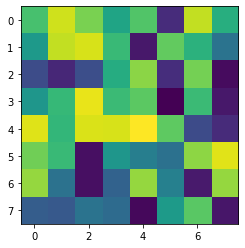

In [17]:
plt.imshow(aa[-1,:,:])

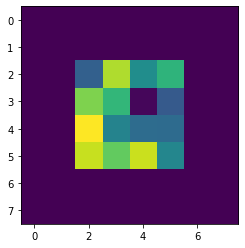

In [18]:
plt.imshow((mask*aa)[0,:,:])

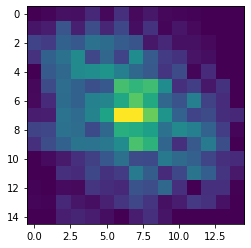

In [19]:
plt.imshow(np.abs(c[-1,:,:]))

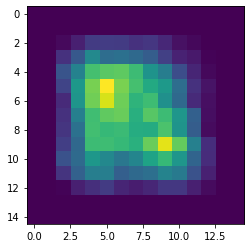

In [20]:
plt.imshow(np.abs(c1[-1,:,:]))